In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t as stud
import sklearn.linear_model as sk

## Question 1.
    Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g.une table contenant les 5 premières observations

In [2]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = " ", header = 0)
#data.columns = ["year" "gnp" "invest" "cpi" "interest"]

data.style

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195,100,4.5
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718,257.9,132.34,5.5
9,1977,1918.3,324.1,140.05,5.46


## Question 2. 
    Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables

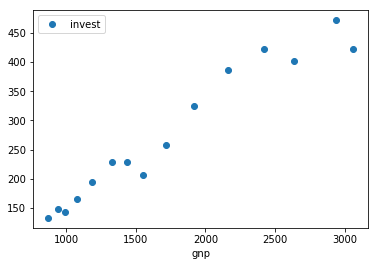

In [3]:
# Graph invest = f(gnp)
data.plot(x = 'gnp', y = 'invest', style='o')

In [4]:
# Modification en echelle log
# ATTENTION A NE PAS RERUN (sinon on prend le log(log(...)))

data['gnp'] = np.log(data['gnp'])

data['invest'] = np.log(data['invest'])

data.style

,year,gnp,invest,cpi,interest
0,1968,6.77239,4.8926,82.54,5.16
1,1969,6.85013,5.00596,86.79,5.87
2,1970,6.90043,4.9712,91.45,5.95
3,1971,6.98249,5.11439,96.01,4.88
4,1972,7.07826,5.273,100,4.5
5,1973,7.19022,5.43721,105.75,6.44
6,1974,7.26836,5.43241,115.08,7.83
7,1975,7.34549,5.32836,125.79,6.25
8,1976,7.44892,5.55257,132.34,5.5
9,1977,7.55919,5.78105,140.05,5.46


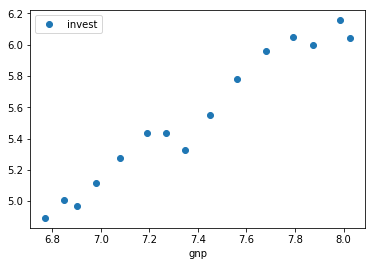

In [5]:
# Graph log(invest) = f(log(gnp))
data.plot(x = 'gnp', y = 'invest', style='o')

## Question 3.

    Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté théta_n chapeau (appart. à R)

In [6]:
# Y = B0 + B1.X + eps

Y = data['invest']
X = data['gnp']
n = len(X)

Y_moy = Y.mean()
X_moy = X.mean()

Sum2_X_Xmoy = ((X - X_moy) * (X - X_moy)).sum()

# Pente
B1 = ( (X-X_moy) * (Y-Y_moy) ).sum() / ( Sum2_X_Xmoy )

# Intercept
B0 = Y_moy - B1*X_moy

# Y chapeau
Ŷ = B0 + B1 * X

# Ecarts - types
var_chap = (1.0 / (n-2)) * ( (Y-Ŷ) * (Y-Ŷ) ).sum()

etB0 = np.sqrt( var_chap * ((1.0 / n) + ((X_moy**2) / Sum2_X_Xmoy)) )
etB1 = np.sqrt( var_chap / Sum2_X_Xmoy )

# Coeff. de determination
R2 = ((Ŷ - Y_moy) * (Ŷ - Y_moy)).sum() / ((Y - Y_moy) * (Y - Y_moy)).sum()


print("B0 = \t" + str(B0))
print("B1 = \t" + str(B1))
print("- - - - - -")
print("etB0 = \t" + str(etB0))
print("etB1 = \t" + str(etB1))
print("- - - - - -")
print("R2 = \t" + str(R2))

B0 = 	-1.9635913352301815
B1 = 	1.0152814015988707
- - - - - -
etB0 = 	0.40954727166230825
etB1 = 	0.05538306035485282
- - - - - -
R2 = 	0.9627572956057852


## Question 4.

    La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student(t-test). Donner la valeur de la statistique de test ainsi que lap-valeur.

On pose <I>H0 : B1 = 0</I>
On souhaite rejeter H0 pour prouver que B1 est statistiquement significative. 

On choisit la statistique de test <I>T1 = (B1_chap - B1) / ( sigma * sqrt( inv( Xt.X )2,2 ) )</I> qui suit une loi de student Tn-2(X)
On prend alors la région de rejet <I>R_alpha = Complémentaire ( IC_alpha )</I>

In [7]:
# Statistique de test
T1 = B1 / etB1

# P-valeur
p_value = 2 * (1 - (stud.cdf(T1,(n-2))))

print("T1 = \t \t" + str(T1))
print("p-value = \t" + str(p_value))

T1 = 	 	18.33198445686667
p-value = 	1.1363709973011282e-10


La p-valeur étant particulièrement faible (de l'ordre de 10**-10), on peut rejeter H0 : B1 = 0 avec un niveau de confiance fort (99,9% par exemple). B1 est donc statistiquement significative

## Question 5.
     
     - Pour GNP égal à 1000, estimer l’investissement prédit par le modèle.
     - Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CI(x) et PI(x),respectivement (avec les notations du polycopié X = (1,1000)T )

In [8]:
# Valeur de l'invest. pour GNP = 1000
Inv1000_log = B0 + B1 * np.log(1000)
Inv1000 = np.exp(Inv1000_log)

# Création de la matrice X avec la colonne d'intersect et la colonnes d'inputs GNP logarithmés
Xintercept = np.transpose(np.array([np.ones(n),
                       X]))

# Calcul intermédiaire de l'inverse de Xt . X
invXtX = np.linalg.inv(np.dot(np.transpose(Xintercept),Xintercept))

# Matrice colonne x
x = np.array([[1],
             [np.log(1000)]])


# Calcul du terme +/- de CI, puis CI
ecart_CI = stud.ppf(0.95, n-2) * np.sqrt(var_chap * np.dot(np.dot(np.transpose(x),invXtX),x))

CI = [ np.exp(Inv1000_log - ecart_CI)[0][0], np.exp(Inv1000_log + ecart_CI)[0][0]]

# Calcul du terme +/- de PI, puis PI
ecart_PI = stud.ppf(0.95, n-2) * np.sqrt(var_chap * ( 1 + np.dot(np.dot(np.transpose(x),invXtX),x) ))

PI = [ np.exp(Inv1000_log - ecart_PI)[0][0], np.exp(Inv1000_log + ecart_PI)[0][0]]


print("Pour GNP = 1000, le modèle prédit Invest = " + str(Inv1000))
print("- - - - - -")
print("CI(x) = " + str(CI))
print("PI(x) = " + str(PI))

Pour GNP = 1000, le modèle prédit Invest = 155.9794279310548
- - - - - -
CI(x) = [146.675526734219, 165.87349286827612]
PI(x) = [132.00238933412913, 184.31167845087424]


## Question 6.

    Sur un graphe avec échelle logarithmique, avec GNP en abscisse et Investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

- - - - - - - - - - - -
Graphe Invest = F(GNP)
- - - - - - - - - - - -


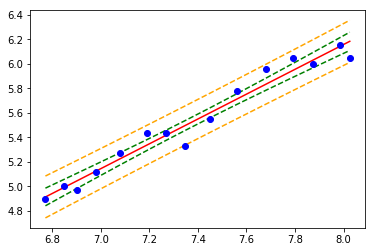

In [9]:
# Intervalle CI - Vert
temp_CI = [stud.ppf(0.95, n-2) * np.sqrt(var_chap * np.dot(np.dot(np.array([[1],[x]]).T,invXtX),np.array([[1],[x]])))
           for x in X]
vect_CI = np.array(temp_CI).T[0][0]

plt.plot(X, B0 + B1*X + vect_CI, 'g--')
plt.plot(X, B0 + B1*X - vect_CI, 'g--')

# Intervalle PI - Orange
temp_PI = [stud.ppf(0.95, n-2) * np.sqrt(var_chap * ( 1 + np.dot(np.dot(np.array([[1],[x]]).T,invXtX),np.array([[1],[x]]))))
           for x in X]
vect_PI = np.array(temp_PI).T[0][0]

plt.plot(X, B0 + B1*X - vect_PI, '--', color='orange')
plt.plot(X, B0 + B1*X + vect_PI, '--', color='orange')

# Droite de regression - Rouge
plt.plot(X, B0 + B1*X, 'r-')

# Données - Bleu
plt.plot(X,Y,'bo')

print("- - - - - - - - - - - -")
print("Graphe Invest = F(GNP)")
print("- - - - - - - - - - - -")

plt.show()

## Question 7.

     En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de dé-termination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [10]:
# Linear Model SkLearn
reg = sk.LinearRegression(fit_intercept = True).fit(Xintercept, Y)

# Calcul des valeurs demandées
B0_sklearn = reg.intercept_
B1_sklearn = reg.coef_[1]
R2_sklearn = reg.score(Xintercept,Y)
Inv1000_sklearn = np.exp(reg.predict(np.array([[1, np.log(1000)]])))[0]

# Comparaison avec les valeurs trouvées précédemment 
compareData = np.array([[B0, B1, R2, Inv1000], [B0_sklearn, B1_sklearn, R2_sklearn, Inv1000_sklearn]])
compareTable = pd.DataFrame({'Manual':compareData[0],'SKLearn':compareData[1]}, index = ["BO", "B1", "R2", "Inv1000"])
compareTable.style

,Manual,SKLearn
BO,-1.96359,-1.96359
B1,1.01528,1.01528
R2,0.962757,0.962757
Inv1000,155.979,155.979


## Question 8.

    Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

- - - - - - - - - - - - - - - - -
Graphe Invest = F(GNP) -- SKLearn
- - - - - - - - - - - - - - - - -


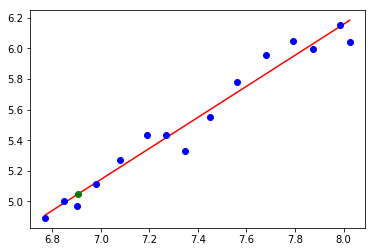

In [11]:
# Droite de regression - Rouge
plt.plot(X, B0_sklearn + B1_sklearn * X, 'r-')

# Point (1000, Inv1000) - Vert
plt.plot(np.log(1000), np.log(Inv1000_sklearn), 'go')

# Données - Bleu
plt.plot(X,Y,'bo')


print("- - - - - - - - - - - - - - - - -")
print("Graphe Invest = F(GNP) -- SKLearn")
print("- - - - - - - - - - - - - - - - -")

plt.show()

## Question 9.

    Pour la régression de Investment sur GNP et Interest, calculer la matrice de Gram. Est-elle de rang plein ?

In [12]:
# Vector des données Interest
Z = data['interest']

# Nouveau Vecteur d'inputs
new_X = np.transpose(np.array([np.ones(n),
                 X,
                 Z]))

# Matrice de Gram
G = np.dot(np.transpose(new_X), new_X) * (1.0 / n)

print("Rg(G) = "+ str(np.linalg.matrix_rank(G)))
print("Donc G est de rang plein")

Rg(G) = 3
Donc G est de rang plein


## Question 10. 

    Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients

In [13]:
# Inverse de G
invG = np.linalg.inv(G)


# Calcul de Theta 3
Theta3 = np.dot(np.dot(invG,np.transpose(new_X)),Y) / n

O0 = Theta3[0]
O1 = Theta3[1]
O2 = Theta3[2]

# Vecteur des estimations
new_Ŷ = np.dot(new_X, Theta3)

# Ecarts - types
new_sigma2 = (1.0 / (n-3)) * ( (Y-new_Ŷ) * (Y-new_Ŷ) ).sum()

et_O0 = np.sqrt( invG[0][0] * new_sigma2 / n)
et_O1 = np.sqrt( invG[1][1] * new_sigma2 / n)
et_O2 = np.sqrt( invG[2][2] * new_sigma2 / n)


# Coeff. de determination
new_R2 = ((new_Ŷ - Y_moy) * (new_Ŷ - Y_moy)).sum() / ((Y - Y_moy) * (Y - Y_moy)).sum()

print("O0 = " + str(O0))
print("O1 = " + str(O1))
print("O2 = " + str(O2))
print("- - - - - - - - - - - -")
print("et_O0 = " + str(et_O0))
print("et_O1 = " + str(et_O1))
print("et_O2 = " + str(et_O2))
print("- - - - - - - - - - - -")
print("R2 = " + str(new_R2))

O0 = -2.1804547259125875
O1 = 1.0512426913198756
O2 = -0.006528879406098505
- - - - - - - - - - - -
et_O0 = 0.6623991977963529
et_O1 = 0.10206137806192067
et_O2 = 0.015344205065603978
- - - - - - - - - - - -
R2 = 0.9633108306727238


De même que précédemment, on pose, pour i = 0,1 ou 2, <i>H0 : Bi = 0</i> On souhaite rejeter H0 pour prouver que Bi est statistiquement significative.

On choisit la statistique de test <i>Ti = Oi / et_0i</i>  qui suit une loi de student <i>Tn-3(X)</i>. On prend alors la région de rejet <i>R_alpha = Complémentaire ( IC_alpha )</i>

In [14]:
# Statistiques de tests
new_T0 = O0 / et_O0
new_T1 = O1 / et_O1
new_T2 = O2 / et_O2

# P-valeur
new_p_value0 = 2 * (1 - (stud.cdf(np.abs(new_T0),(n-3))))
new_p_value1 = 2 * (1 - (stud.cdf(np.abs(new_T1),(n-3))))
new_p_value2 = 2 * (1 - (stud.cdf(np.abs(new_T2),(n-3))))


print("T0 = " + str(new_T0))
print("T1 = " + str(new_T1))
print("T2 = " + str(new_T2))
print("- - - - - - - - - - - -")
print("p-value 0 = " + str(new_p_value0))
print("p-value 1 = " + str(new_p_value1))
print("p-value 2 = " + str(new_p_value2))

T0 = -3.2917532707866344
T1 = 10.300102852639187
T2 = -0.4254947961255962
- - - - - - - - - - - -
p-value 0 = 0.006438367050912719
p-value 1 = 2.5995168484449493e-07
p-value 2 = 0.6780071418824674


Les p-value sur O0 et O1 sont assez faibles (<0.01) pour conclure que O0 et O1 sont significatifs. Pour O2 par contre, la p-value trouvée ne nous permet pas de conclure sur O2

## Question 11.

    Pour les valeurs de GNP = 1000 et Interest = 10, i.e., x = (p1 , 1000 , 10)T, prédire log(investment) et donner les intervalles de confiance CI(x) et PI(x) au niveau 99,9%

In [15]:
# Valeur de l'invest. pour GNP = 1000
new_Inv1000_log = O0 + O1 * np.log(1000) + O2 * 10
new_Inv1000 = np.exp(new_Inv1000_log)


# Matrice colonne x
x = np.array([[1],
             [np.log(1000)],
             [10]])


# Calcul du terme +/- de CI, puis CI
new_ecart_CI = stud.ppf(0.9995, n-3) * np.sqrt(new_sigma2 * np.dot(np.dot(np.transpose(x),invG),x) / n)

new_CI = [ new_Inv1000_log - new_ecart_CI[0][0], new_Inv1000_log + new_ecart_CI[0][0] ]


# Calcul du terme +/- de PI, puis PI
new_ecart_PI = stud.ppf(0.9995, n-3) * np.sqrt(new_sigma2 * (1 + np.dot(np.dot(np.transpose(x),invG),x) / n))

new_PI = [ new_Inv1000_log - new_ecart_PI[0][0], new_Inv1000_log + new_ecart_PI[0][0] ]


print("Log(Invest) = " + str(new_Inv1000_log))
print("CI(x) = " + str(new_CI))
print("PI(x) = " + str(new_PI))

Log(Invest) = 5.015983730482688
CI(x) = [4.640184036688094, 5.391783424277282]
PI(x) = [4.4738033436402755, 5.5581641173251]


## Question 12.

     Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confianceà 99,9% (ces surfaces seront tracées sur le domaine de définition des données)

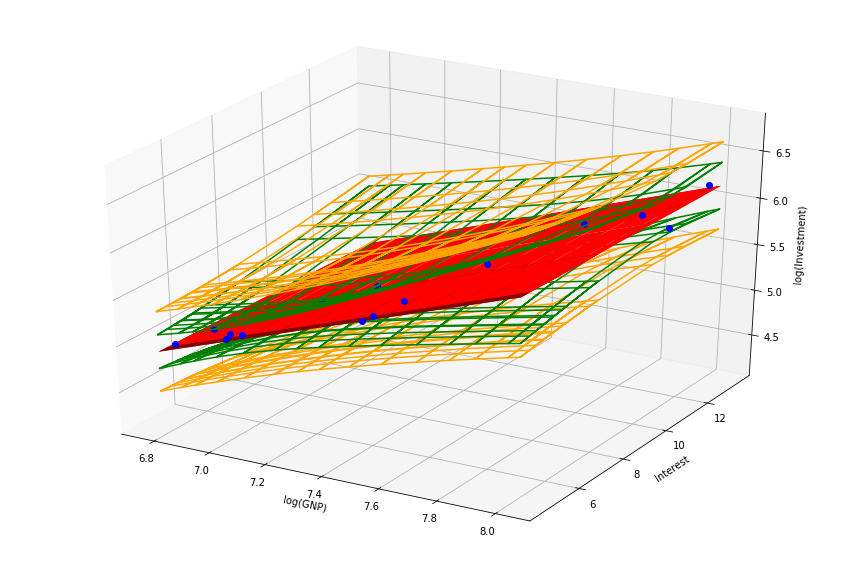

In [18]:
plt.rcParams["figure.figsize"] = [15,10]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)');

# Données - Bleu
ax.plot3D(X, Z, Y, 'bo')

# Plan de regression
xx, yy = np.meshgrid(X, Z)
z = O0 + O1 * xx + O2 * yy
ax.plot_surface(xx, yy, z, color="r")

# Surfaces CI
def fplus(a,b):
    M = invG/n
    T = M[0][0] + a * M[0][1] + b * M[0][2] + a * (M[1][0] + a * M[1][1] + b * M[1][2]) + b * (M[2][0] + a * M[2][1] + b * M[2][2])
    temp = O0 + O1 * a + O2 * b + stud.ppf(0.9995, n-3) * np.sqrt( new_sigma2 * T)
    return temp

def fmoins(a,b):
    M = invG/n
    T = M[0][0] + a * M[0][1] + b * M[0][2] + a * (M[1][0] + a * M[1][1] + b * M[1][2]) + b * (M[2][0] + a * M[2][1] + b * M[2][2])
    temp = O0 + O1 * a + O2 * b - stud.ppf(0.9995, n-3) * np.sqrt( new_sigma2 * T)
    return temp

z1 = fplus(xx, yy)
z2 = fmoins(xx, yy)

ax.plot_wireframe( xx, yy, z1, color = "g" )
ax.plot_wireframe( xx, yy, z2, color = "g" )

# Surfaces PI
def fplus(a,b):
    M = invG/n
    T = M[0][0] + a * M[0][1] + b * M[0][2] + a * (M[1][0] + a * M[1][1] + b * M[1][2]) + b * (M[2][0] + a * M[2][1] + b * M[2][2])
    temp = O0 + O1 * a + O2 * b + stud.ppf(0.9995, n-3) * np.sqrt( new_sigma2 * (1+ T))
    return temp

def fmoins(a,b):
    M = invG/n
    T = M[0][0] + a * M[0][1] + b * M[0][2] + a * (M[1][0] + a * M[1][1] + b * M[1][2]) + b * (M[2][0] + a * M[2][1] + b * M[2][2])
    temp = O0 + O1 * a + O2 * b - stud.ppf(0.9995, n-3) * np.sqrt( new_sigma2 * (1 + T))
    return temp

z1 = fplus(xx, yy)
z2 = fmoins(xx, yy)

ax.plot_wireframe( xx, yy, z1, color = "orange" )
ax.plot_wireframe( xx, yy, z2, color = "orange" )

plt.show()

## Question 13.

    En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient dedétermination ainsi que l’investissement prédit par le modèle quand GNP vaut 100 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes

In [17]:
# Linear Model SkLearn
reg = sk.LinearRegression(fit_intercept = True).fit(new_X, Y)

# Calcul des valeurs demandées
O0_sklearn = reg.intercept_
O1_sklearn = reg.coef_[1]
O2_sklearn = reg.coef_[2]
new_R2_sklearn = reg.score(new_X,Y)
new_Inv1000_sklearn = np.exp(reg.predict(np.array([[1, np.log(1000), 10]])))[0]

# Comparaison avec les valeurs trouvées précédemment 
compareData = np.array([[O0, O1, O2, new_R2, new_Inv1000], [O0_sklearn, O1_sklearn, O2_sklearn, new_R2_sklearn, new_Inv1000_sklearn]])
compareTable = pd.DataFrame({'Manual':compareData[0],'SKLearn':compareData[1]}, index = ["OO", "O1", "O2", "R2", "Inv1000"])
compareTable.style

,Manual,SKLearn
OO,-2.18045,-2.18045
O1,1.05124,1.05124
O2,-0.00652888,-0.00652888
R2,0.963311,0.963311
Inv1000,150.804,150.804
